<a href="https://colab.research.google.com/github/rajveer7790/calculator-codesoft/blob/main/AI%20Enhanced%20Battery%20Health%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Basic imports
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import warnings

# Ignore future warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [ ]:
# Step 2: Load metadata.csv file
metadata_path = "/content/drive/MyDrive/battery_data/cleaned_dataset/metadata.csv"
metadata = pd.read_csv(metadata_path)

# Preview first 5 rows
metadata.head()


,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
0,discharge,[2010. 7. 21. 15. 0. ...,4,B0047,0,1,00001.csv,1.6743047446975208,NaN,NaN
1,impedance,[2010. 7. 21. 16. 53. ...,24,B0047,1,2,00002.csv,NaN,0.05605783343888099,0.20097016584458333
2,charge,[2010. 7. 21. 17. 25. ...,4,B0047,2,3,00003.csv,NaN,NaN,NaN
3,impedance,[2010 7 21 20 31 5],24,B0047,3,4,00004.csv,NaN,0.05319185850921101,0.16473399914864734
4,discharge,[2.0100e+03 7.0000e+00 2.1000e+01 2.1000e+01 2...,4,B0047,4,5,00005.csv,1.5243662105099023,NaN,NaN


In [ ]:
# Step 3: Filter only discharge cycles and exclude bad batteries
metadata_path = "/content/drive/MyDrive/battery_data/cleaned_dataset/metadata.csv"
metadata = pd.read_csv(metadata_path)

# Convert 'battery_id' to string
metadata['battery_id'] = metadata['battery_id'].astype(str)

# List of excluded batteries
excluded_batteries = ['B0049', 'B0050', 'B0051', 'B0052']

# Filter discharge cycles and exclude bad batteries
discharge_metadata = metadata[
    (metadata['type'] == 'discharge') &
    (~metadata['battery_id'].isin(excluded_batteries))
].copy()

# Add cycle number (per battery)
discharge_metadata['cycle_number'] = discharge_metadata.groupby('battery_id').cumcount() + 1

# Preview the filtered data
discharge_metadata.head()


,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct,cycle_number
0,discharge,[2010. 7. 21. 15. 0. ...,4,B0047,0,1,00001.csv,1.6743047446975208,NaN,NaN,1
4,discharge,[2.0100e+03 7.0000e+00 2.1000e+01 2.1000e+01 2...,4,B0047,4,5,00005.csv,1.5243662105099023,NaN,NaN,2
6,discharge,[2.010e+03 7.000e+00 2.200e+01 1.000e+00 4.000...,4,B0047,6,7,00007.csv,1.5080762969973425,NaN,NaN,3
8,discharge,[2010. 7. 22. 6. 16. ...,4,B0047,8,9,00009.csv,1.4835577960067696,NaN,NaN,4
10,discharge,[2010. 7. 22. 10. 51. ...,4,B0047,10,11,00011.csv,1.4671391666146525,NaN,NaN,5


In [ ]:
import os
import pandas as pd

# Step 4: Load a sample discharge CSV file
data_path = "/content/drive/MyDrive/battery_data/cleaned_dataset/data"
sample_filename = discharge_metadata.iloc[0]['filename']
sample_file_path = os.path.join(data_path, sample_filename)

# Load the sample CSV file into a DataFrame
sample_df = pd.read_csv(sample_file_path)

# Preview the first 5 rows of the sample data
sample_df.head(100)


,Voltage_measured,Current_measured,Temperature_measured,Current_load,Voltage_load,Time
0,4.246711,0.000252,6.212696,0.0002,0.000,0.000
1,4.246764,-0.001411,6.234019,0.0002,4.262,9.360
2,4.039277,-0.995093,6.250255,1.0000,3.465,23.281
3,4.019506,-0.996731,6.302176,1.0000,3.451,36.406
4,4.004763,-0.992845,6.361645,1.0000,3.438,49.625
...,...,...,...,...,...,...
95,3.723619,-0.994245,8.624215,1.0000,3.174,1241.625
96,3.722013,-0.995041,8.643997,1.0000,3.172,1254.750
97,3.720080,-0.995401,8.619536,1.0000,3.171,1267.828
98,3.718113,-0.994842,8.455470,1.0000,3.169,1280.875


In [ ]:
# Step 5: Truncate data where voltage < 2.7V
cutoff_index = sample_df[sample_df['Voltage_measured'] < 2.7].index.min()

if pd.isna(cutoff_index):
    truncated_df = sample_df.copy()
else:
    truncated_df = sample_df.iloc[:cutoff_index].copy()

print(f"Original rows: {len(sample_df)}, After cutoff: {len(truncated_df)}")
truncated_df.head()


Original rows: 490, After cutoff: 462


,Voltage_measured,Current_measured,Temperature_measured,Current_load,Voltage_load,Time
0,4.246711,0.000252,6.212696,0.0002,0.000,0.000
1,4.246764,-0.001411,6.234019,0.0002,4.262,9.360
2,4.039277,-0.995093,6.250255,1.0000,3.465,23.281
3,4.019506,-0.996731,6.302176,1.0000,3.451,36.406
4,4.004763,-0.992845,6.361645,1.0000,3.438,49.625


In [ ]:
# Step 6: Calculate Capacity
truncated_df['Time_diff_hr'] = truncated_df['Time'].diff().fillna(0) / 3600  # Convert seconds to hours
truncated_df['Delta_Q'] = truncated_df['Current_measured'] * truncated_df['Time_diff_hr']

# Capacity in Ah (absolute value to ignore sign)
capacity = abs(truncated_df['Delta_Q'].sum())

print(f"Estimated Capacity: {capacity:.4f} Ah")
truncated_df[['Time', 'Current_measured', 'Time_diff_hr', 'Delta_Q']].head()


Estimated Capacity: 1.6725 Ah


,Time,Current_measured,Time_diff_hr,Delta_Q
0,0.000,0.000252,0.000000,0.000000
1,9.360,-0.001411,0.002600,-0.000004
2,23.281,-0.995093,0.003867,-0.003848
3,36.406,-0.996731,0.003646,-0.003634
4,49.625,-0.992845,0.003672,-0.003646


In [ ]:
# Step 7: Calculate SoC over time
truncated_df['Cumulative_Q'] = abs(truncated_df['Delta_Q'].cumsum())  # Cumulative charge in Ah
truncated_df['SoC'] = 100 * (1 - truncated_df['Cumulative_Q'] / capacity)  # SoC in percentage

# Preview the first 10 rows of the relevant columns
truncated_df[['Time', 'Current_measured', 'Delta_Q', 'Cumulative_Q', 'SoC']].head(10)


,Time,Current_measured,Delta_Q,Cumulative_Q,SoC
0,0.000,0.000252,0.000000,0.000000,100.000000
1,9.360,-0.001411,-0.000004,0.000004,99.999781
2,23.281,-0.995093,-0.003848,0.003852,99.769711
3,36.406,-0.996731,-0.003634,0.007486,99.552440
4,49.625,-0.992845,-0.003646,0.011131,99.334466
5,62.813,-0.995957,-0.003649,0.014780,99.116322
6,75.891,-0.994665,-0.003613,0.018393,98.900278
7,89.031,-0.998753,-0.003645,0.022039,98.682317
8,102.141,-0.994140,-0.003620,0.025659,98.465859
9,115.297,-0.993797,-0.003632,0.029291,98.248716


In [ ]:
# Step 8: Calculate State of Health (SoH)
initial_capacity = 1.6743  # from metadata (original capacity of new battery)
SoH = (capacity / initial_capacity) * 100

print(f"Estimated SoH: {SoH:.2f}%")


Estimated SoH: 99.89%


In [ ]:
processed_dfs = []
for _, row in tqdm(discharge_metadata.head(300).iterrows(), total=300):  # Limit to 50 files
    try:
        file_path = f"/content/drive/MyDrive/battery_data/cleaned_dataset/data/{row['filename']}"
        df = pd.read_csv(file_path)

        cutoff_idx = df[df['Voltage_measured'] < 2.7].index.min()
        truncated_df = df if pd.isna(cutoff_idx) else df.iloc[:cutoff_idx].copy()

        # 👇 Add filename for tracking
        truncated_df['filename'] = row['filename']

        # Capacity calculation
        truncated_df['Time_diff_hr'] = truncated_df['Time'].diff().fillna(0) / 3600
        truncated_df['Delta_Q'] = truncated_df['Current_measured'] * truncated_df['Time_diff_hr']
        capacity = abs(truncated_df['Delta_Q'].sum())

        # SoC calculation
        truncated_df['Cumulative_Q'] = abs(truncated_df['Delta_Q'].cumsum())
        truncated_df['SoC'] = 100 * (1 - truncated_df['Cumulative_Q'] / capacity)

        # SoH calculation
        SoH = (capacity / initial_capacity) * 100
        truncated_df['SoH'] = SoH

        # Append to list
        processed_dfs.append(truncated_df)

    except Exception as e:
        print(f"Error processing {row['filename']}: {str(e)}")
full_dataset = pd.concat(processed_dfs, ignore_index=True)

100%|██████████| 300/300 [00:52<00:00,  5.74it/s]


In [ ]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86157 entries, 0 to 86156
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Voltage_measured      86157 non-null  float64
 1   Current_measured      86157 non-null  float64
 2   Temperature_measured  86157 non-null  float64
 3   Current_load          86157 non-null  float64
 4   Voltage_load          86157 non-null  float64
 5   Time                  86157 non-null  float64
 6   filename              86157 non-null  object 
 7   Time_diff_hr          86157 non-null  float64
 8   Delta_Q               86157 non-null  float64
 9   Cumulative_Q          86157 non-null  float64
 10  SoC                   86157 non-null  float64
 11  SoH                   86157 non-null  float64
dtypes: float64(11), object(1)
memory usage: 7.9+ MB


In [ ]:
full_dataset.head(1000)

,Voltage_measured,Current_measured,Temperature_measured,Current_load,Voltage_load,Time,filename,Time_diff_hr,Delta_Q,Cumulative_Q,SoC,SoH
0,4.246711,0.000252,6.212696,0.0002,0.000,0.000,00001.csv,0.000000,0.000000,0.000000,100.000000,99.894071
1,4.246764,-0.001411,6.234019,0.0002,4.262,9.360,00001.csv,0.002600,-0.000004,0.000004,99.999781,99.894071
2,4.039277,-0.995093,6.250255,1.0000,3.465,23.281,00001.csv,0.003867,-0.003848,0.003852,99.769711,99.894071
3,4.019506,-0.996731,6.302176,1.0000,3.451,36.406,00001.csv,0.003646,-0.003634,0.007486,99.552440,99.894071
4,4.004763,-0.992845,6.361645,1.0000,3.438,49.625,00001.csv,0.003672,-0.003646,0.011131,99.334466,99.894071
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.639370,-0.995127,6.624780,1.0000,3.086,1499.219,00007.csv,0.003654,-0.003637,0.412031,72.646062,89.965711
996,3.636692,-0.996194,6.501140,1.0000,3.084,1512.328,00007.csv,0.003641,-0.003628,0.415659,72.405237,89.965711
997,3.633847,-0.996795,6.394945,1.0000,3.080,1525.422,00007.csv,0.003637,-0.003626,0.419284,72.164543,89.965711
998,3.631060,-0.995078,6.287211,1.0000,3.077,1538.610,00007.csv,0.003663,-0.003645,0.422930,71.922539,89.965711


First few rows of the processed dataset:
   Voltage_measured  Current_measured  Temperature_measured  Current_load  \
0          4.246711          0.000252              6.212696        0.0002   
1          4.246764         -0.001411              6.234019        0.0002   
2          4.039277         -0.995093              6.250255        1.0000   
3          4.019506         -0.996731              6.302176        1.0000   
4          4.004763         -0.992845              6.361645        1.0000   

   Voltage_load    Time   filename  Time_diff_hr   Delta_Q  Cumulative_Q  \
0         0.000   0.000  00001.csv      0.000000  0.000000      0.000000   
1         4.262   9.360  00001.csv      0.002600 -0.000004      0.000004   
2         3.465  23.281  00001.csv      0.003867 -0.003848      0.003852   
3         3.451  36.406  00001.csv      0.003646 -0.003634      0.007486   
4         3.438  49.625  00001.csv      0.003672 -0.003646      0.011131   

          SoC        SoH  
0  100.00000

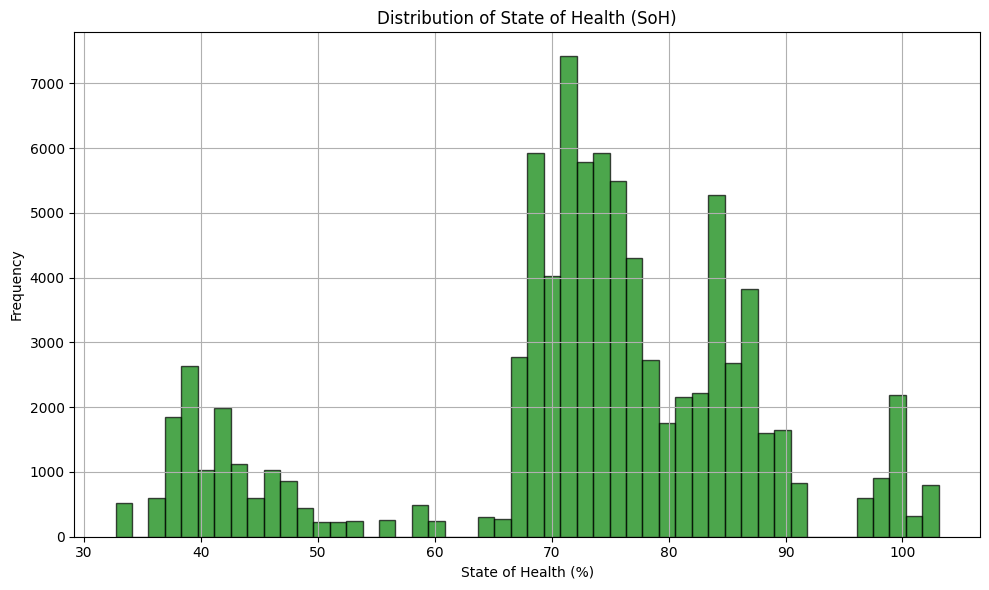


Summary statistics of the dataset:
       Voltage_measured  Current_measured  Temperature_measured  Current_load  \
count      86157.000000      86157.000000          86157.000000  86157.000000   
mean           3.416716         -1.035737              9.391914      1.035837   
std            0.272727          0.217716              4.651059      0.225168   
min            2.700058         -1.992663              3.635807      0.000200   
25%            3.253708         -1.006218              7.484093      0.998800   
50%            3.442601         -0.998067              8.354068      0.999000   
75%            3.599525         -0.995667              9.631961      1.000000   
max            4.246764          0.003047             36.231350      4.148800   

       Voltage_load          Time  Time_diff_hr       Delta_Q  Cumulative_Q  \
count  86157.000000  86157.000000  86157.000000  86157.000000  86157.000000   
mean       2.867460   2114.453215      0.003856     -0.003963      0.602405 

In [ ]:
# Step 8: State of Health (SoH) already calculated and stored in 'full_dataset'

# Step 9: Final Dataset Processing and Output

import matplotlib.pyplot as plt

# Checking the dataset details
print("First few rows of the processed dataset:")
print(full_dataset.head())  # Display first few rows of the final dataset

# Check for any SoH values greater than 100%
print("\nChecking SoH values greater than 100%")
soh_above_100 = full_dataset[full_dataset['SoH'] > 100]
print(soh_above_100)

# Save the final processed dataset to CSV
output_corrected_path = "/content/drive/MyDrive/battery_data/cleaned_dataset/final_battery_health_data_corrected.csv"  # Update the path
full_dataset.to_csv(output_corrected_path, index=False)
print(f"\nCorrected dataset saved at: {output_corrected_path}")

# Analyze SoH distribution
plt.figure(figsize=(10, 6))
plt.hist(full_dataset['SoH'], bins=50, color='green', alpha=0.7, edgecolor='black')
plt.title("Distribution of State of Health (SoH)")
plt.xlabel("State of Health (%)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

# Summary statistics
print("\nSummary statistics of the dataset:")
print(full_dataset.describe())

# Checking for missing values
print("\nChecking for missing values:")
print(full_dataset.isnull().sum())


In [ ]:
print(full_dataset.columns)


Index(['Voltage_measured', 'Current_measured', 'Temperature_measured',
       'Current_load', 'Voltage_load', 'Time', 'filename', 'Time_diff_hr',
       'Delta_Q', 'Cumulative_Q', 'SoC', 'SoH'],
      dtype='object')


In [ ]:
full_dataset.head()

,Voltage_measured,Current_measured,Temperature_measured,Current_load,Voltage_load,Time,filename,Time_diff_hr,Delta_Q,Cumulative_Q,SoC,SoH
0,4.246711,0.000252,6.212696,0.0002,0.000,0.000,00001.csv,0.000000,0.000000,0.000000,100.000000,99.894071
1,4.246764,-0.001411,6.234019,0.0002,4.262,9.360,00001.csv,0.002600,-0.000004,0.000004,99.999781,99.894071
2,4.039277,-0.995093,6.250255,1.0000,3.465,23.281,00001.csv,0.003867,-0.003848,0.003852,99.769711,99.894071
3,4.019506,-0.996731,6.302176,1.0000,3.451,36.406,00001.csv,0.003646,-0.003634,0.007486,99.552440,99.894071
4,4.004763,-0.992845,6.361645,1.0000,3.438,49.625,00001.csv,0.003672,-0.003646,0.011131,99.334466,99.894071


In [ ]:
!pip install tqdm
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import warnings

# Ignore future warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# 1. Load Metadata and Filter for Charging Cycles
metadata_path = "/content/drive/MyDrive/battery_data/cleaned_dataset/metadata.csv"
metadata = pd.read_csv(metadata_path)
metadata['battery_id'] = metadata['battery_id'].astype(str)
excluded_batteries = ['B0049', 'B0050', 'B0051', 'B0052']

# Filter for 'charge' cycles and exclude bad batteries
charge_metadata = metadata[
    (metadata['type'] == 'charge') &
    (~metadata['battery_id'].isin(excluded_batteries))
].copy()
charge_metadata['cycle_number'] = charge_metadata.groupby('battery_id').cumcount() + 1

# Limit to the first 300 charging cycles
charge_metadata = charge_metadata.head(300)

# 2. Process Each Charging Cycle and Calculate SoH
processed_dfs = []
initial_capacity = 1.6743  # Assuming this is the initial capacity of a new battery

for _, row in tqdm(charge_metadata.iterrows(), total=len(charge_metadata)):
    try:
        file_path = f"/content/drive/MyDrive/battery_data/cleaned_dataset/data/{row['filename']}"
        df = pd.read_csv(file_path)

        # Capacity Calculation for Charging
        df['Time_diff_hr'] = df['Time'].diff().fillna(0) / 3600
        df['Delta_Q'] = df['Current_measured'] * df['Time_diff_hr']
        capacity = df['Delta_Q'].sum()  # No need for abs() during charging

        # SoH Calculation for Charging
        SoH = (capacity / initial_capacity) * 100
        df['SoH'] = SoH  # Assign SoH to the DataFrame

        # Ensure SoH values do not exceed 100%
        df['SoH'] = df['SoH'].clip(upper=100)

        # Add filename and cycle_number for tracking
        df['filename'] = row['filename']
        df['cycle_number'] = row['cycle_number'] # Include cycle_number in the individual DataFrames

        # Calculate SoC for charging cycles
        df['Cumulative_Q'] = df['Delta_Q'].cumsum()
        df['SoC'] = 100 * (df['Cumulative_Q'] / capacity) # Calculate and add SoC column

        processed_dfs.append(df)

    except Exception as e:
        print(f"Error processing {row['filename']}: {str(e)}")

# 3. Create the Full Dataset for Charging Cycles
full_dataset_charge = pd.concat(processed_dfs, ignore_index=True)

# 4. Save to Google Drive
output_path = "/content/drive/MyDrive/battery_data/cleaned_dataset/final_battery_health_data_charge.csv"
full_dataset_charge.to_csv(output_path, index=False)
print(f"Charging data with SoH processed and saved to: {output_path}")

100%|██████████| 300/300 [00:06<00:00, 49.18it/s]


Charging data with SoH processed and saved to: /content/drive/MyDrive/battery_data/cleaned_dataset/final_battery_health_data_charge.csv


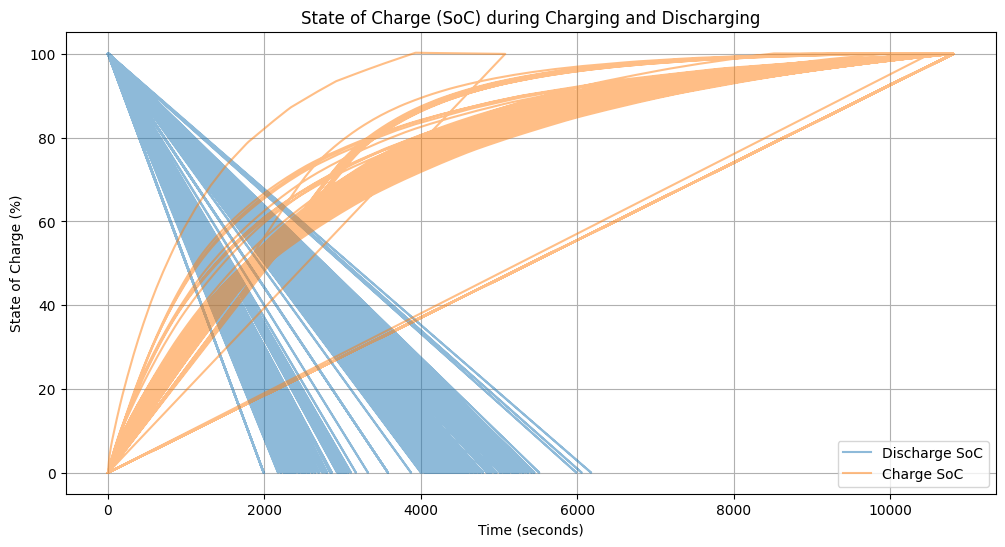

In [ ]:
import matplotlib.pyplot as plt

# Plot SoC during charging and discharging
plt.figure(figsize=(12, 6))
plt.plot(full_dataset['Time'], full_dataset['SoC'], label='Discharge SoC', alpha=0.5)
plt.plot(full_dataset_charge['Time'], full_dataset_charge['SoC'], label='Charge SoC', alpha=0.5)
plt.xlabel('Time (seconds)')
plt.ylabel('State of Charge (%)')
plt.title('State of Charge (SoC) during Charging and Discharging')
plt.grid(True)
plt.legend()
plt.show()

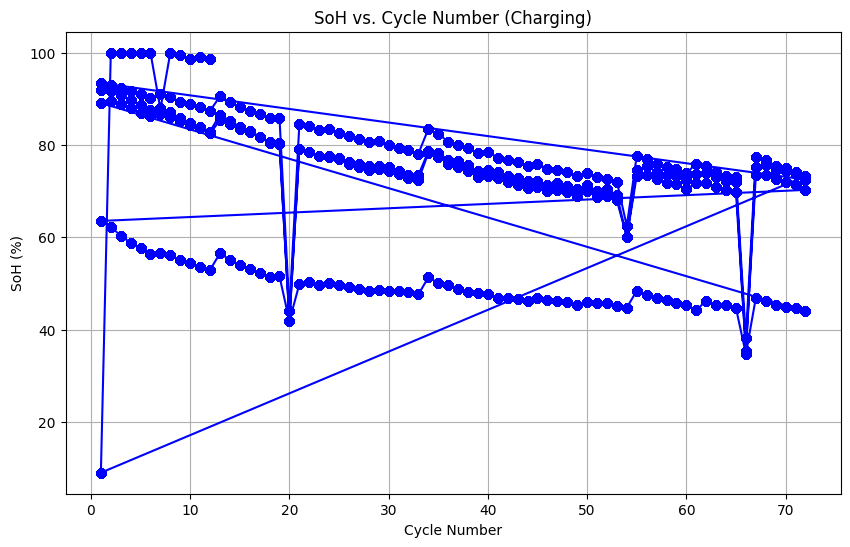

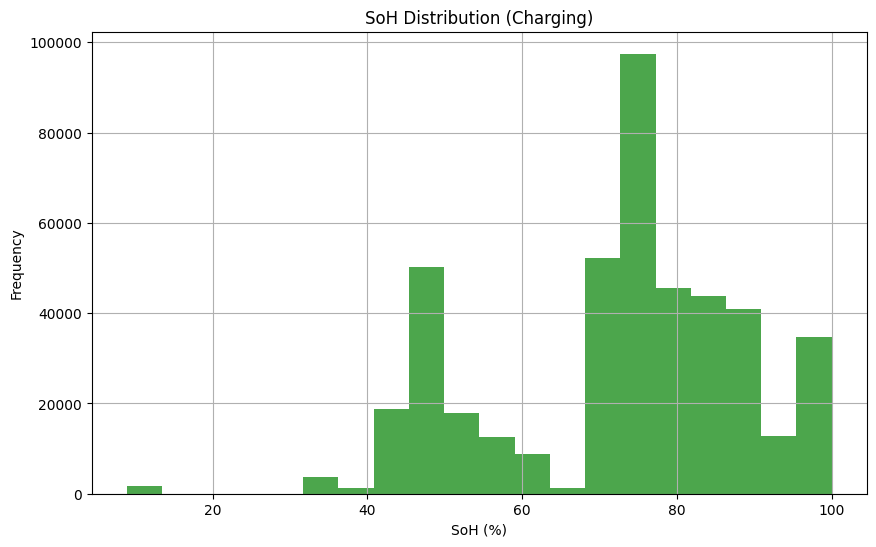

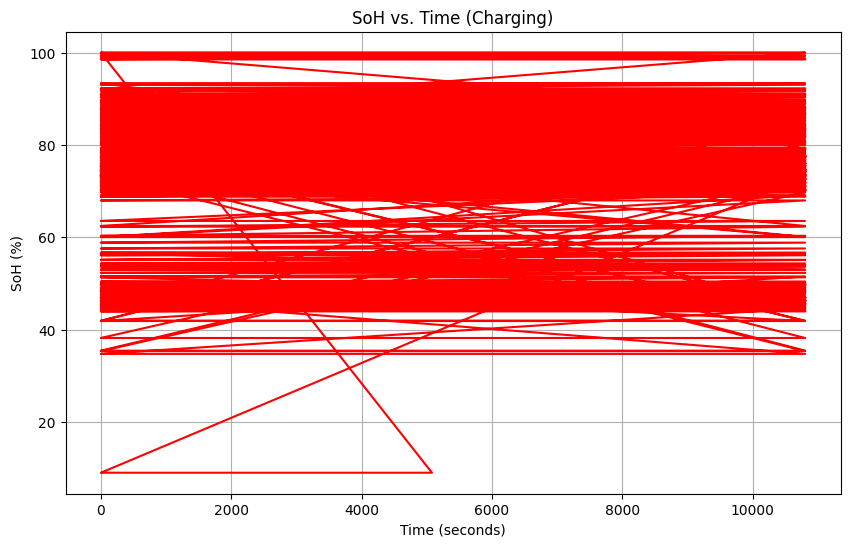

In [ ]:
import matplotlib.pyplot as plt

# 1. SoH vs. Cycle Number
plt.figure(figsize=(10, 6))
plt.plot(full_dataset_charge['cycle_number'], full_dataset_charge['SoH'], marker='o', linestyle='-', color='b')
plt.title('SoH vs. Cycle Number (Charging)')
plt.xlabel('Cycle Number')
plt.ylabel('SoH (%)')
plt.grid(True)
plt.show()

# 2. SoH Distribution
plt.figure(figsize=(10, 6))
plt.hist(full_dataset_charge['SoH'], bins=20, color='g', alpha=0.7)
plt.title('SoH Distribution (Charging)')
plt.xlabel('SoH (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 3. SoH vs. Time
plt.figure(figsize=(10, 6))
plt.plot(full_dataset_charge['Time'], full_dataset_charge['SoH'], linestyle='-', color='r')
plt.title('SoH vs. Time (Charging)')
plt.xlabel('Time (seconds)')
plt.ylabel('SoH (%)')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load discharging CSV using the correct variable name and path
df = full_dataset  # Assuming 'full_dataset' contains your discharging data

# Preview
df.head()

,Voltage_measured,Current_measured,Temperature_measured,Current_load,Voltage_load,Time,filename,Time_diff_hr,Delta_Q,Cumulative_Q,SoC,SoH
0,4.246711,0.000252,6.212696,0.0002,0.000,0.000,00001.csv,0.000000,0.000000,0.000000,100.000000,99.894071
1,4.246764,-0.001411,6.234019,0.0002,4.262,9.360,00001.csv,0.002600,-0.000004,0.000004,99.999781,99.894071
2,4.039277,-0.995093,6.250255,1.0000,3.465,23.281,00001.csv,0.003867,-0.003848,0.003852,99.769711,99.894071
3,4.019506,-0.996731,6.302176,1.0000,3.451,36.406,00001.csv,0.003646,-0.003634,0.007486,99.552440,99.894071
4,4.004763,-0.992845,6.361645,1.0000,3.438,49.625,00001.csv,0.003672,-0.003646,0.011131,99.334466,99.894071


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86157 entries, 0 to 86156
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Voltage_measured      86157 non-null  float64
 1   Current_measured      86157 non-null  float64
 2   Temperature_measured  86157 non-null  float64
 3   Current_load          86157 non-null  float64
 4   Voltage_load          86157 non-null  float64
 5   Time                  86157 non-null  float64
 6   filename              86157 non-null  object 
 7   Time_diff_hr          86157 non-null  float64
 8   Delta_Q               86157 non-null  float64
 9   Cumulative_Q          86157 non-null  float64
 10  SoC                   86157 non-null  float64
 11  SoH                   86157 non-null  float64
dtypes: float64(11), object(1)
memory usage: 7.9+ MB
None
       Voltage_measured  Current_measured  Temperature_measured  Current_load  \
count      86157.000000      86157.000

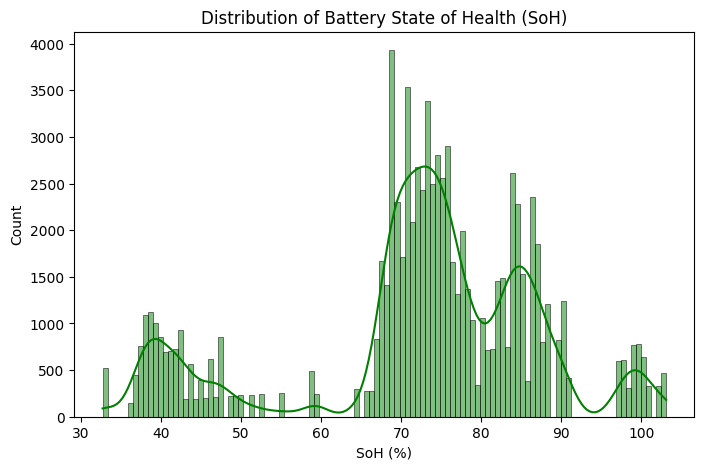

In [ ]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

# Plot SoH
plt.figure(figsize=(8,5))
sns.histplot(df['SoH'], kde=True, color='green')
plt.title('Distribution of Battery State of Health (SoH)')
plt.xlabel('SoH (%)')
plt.ylabel('Count')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Assuming 'full_dataset' contains your discharging data
df = full_dataset

# Preview
df.head()

# Select relevant features and target
features = ['Voltage_measured', 'Current_measured', 'Temperature_measured', 'Time', 'SoC']
target = 'SoH'

X = df[features]
y = df[target]

# Scale data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


🔍 Mean Squared Error: 1.9872
📉 Mean Absolute Error: 0.5952
📊 R² Score: 0.9919


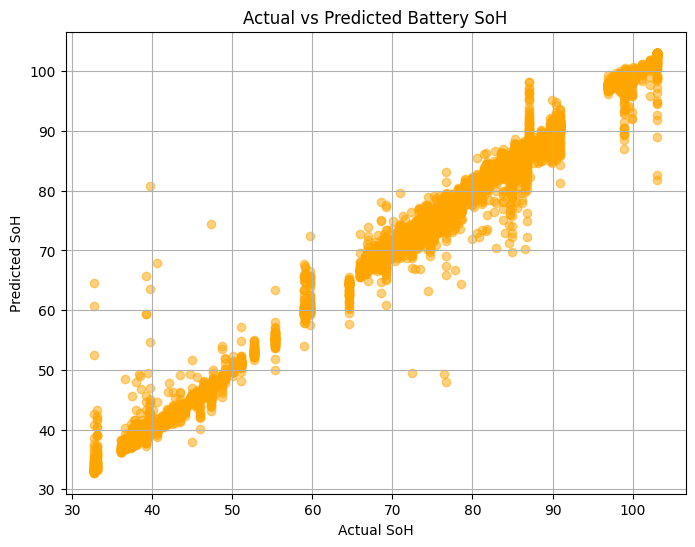

In [ ]:
# Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"🔍 Mean Squared Error: {mse:.4f}")
print(f"📉 Mean Absolute Error: {mae:.4f}")
print(f"📊 R² Score: {r2:.4f}")

# Plot predictions vs actual
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='orange')
plt.xlabel("Actual SoH")
plt.ylabel("Predicted SoH")
plt.title("Actual vs Predicted Battery SoH")
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


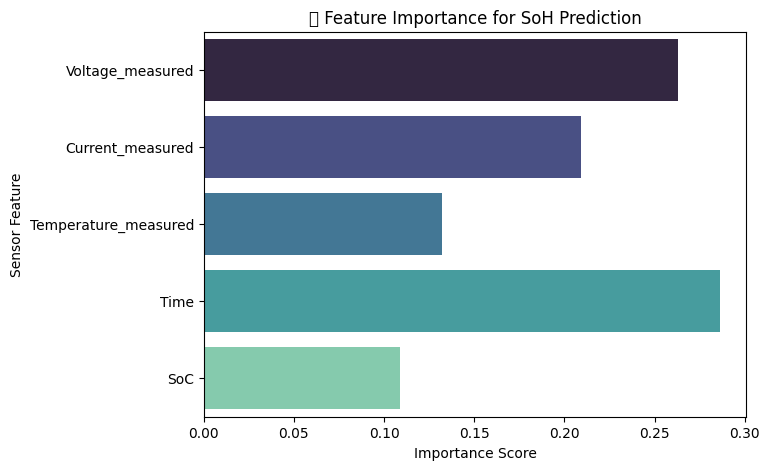

In [ ]:
import numpy as np

# Plot feature importance
importances = model.feature_importances_
feature_names = features

plt.figure(figsize=(7,5))
sns.barplot(x=importances, y=feature_names, palette='mako')
plt.title("🔍 Feature Importance for SoH Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Sensor Feature")
plt.show()


In [ ]:
!pip install xgboost


In [ ]:
import xgboost as xgb


In [ ]:
# Initialize XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Train model
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)


🔍 XGBoost Mean Squared Error: 4.8348
📉 XGBoost Mean Absolute Error: 1.2332
📊 XGBoost R² Score: 0.9802


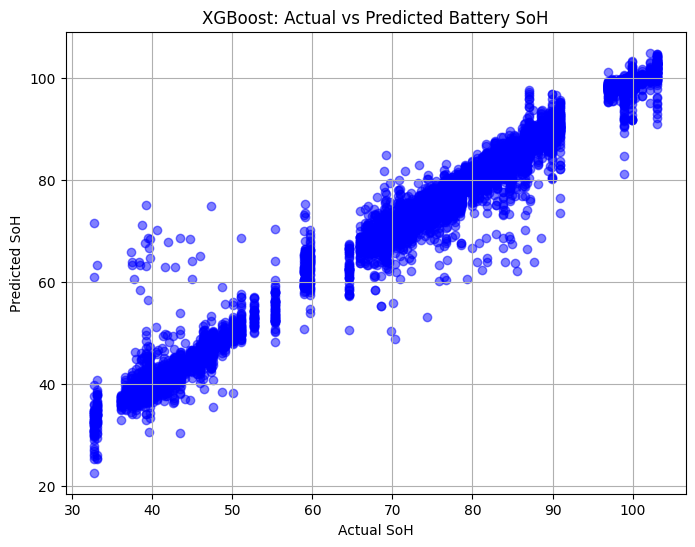

In [ ]:
# Metrics for XGBoost
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"🔍 XGBoost Mean Squared Error: {mse_xgb:.4f}")
print(f"📉 XGBoost Mean Absolute Error: {mae_xgb:.4f}")
print(f"📊 XGBoost R² Score: {r2_xgb:.4f}")

# Plot Actual vs Predicted for XGBoost
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5, color='blue')
plt.xlabel("Actual SoH")
plt.ylabel("Predicted SoH")
plt.title("XGBoost: Actual vs Predicted Battery SoH")
plt.grid(True)
plt.show()


In [ ]:
import joblib
# Model ko save karo
# Assign the trained model to 'rf_model'
rf_model = model  # Assuming 'model' is your trained RandomForestRegressor
joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [ ]:
from google.colab import files
import joblib

# ... (your existing code to train and save the model) ...

# Assign the trained model to 'rf_model' before saving
rf_model = model  # Assuming 'model' is your trained RandomForestRegressor
joblib.dump(rf_model, 'random_forest_model.pkl')

# Download the model file
files.download('random_forest_model.pkl')  # Model file download karo

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>